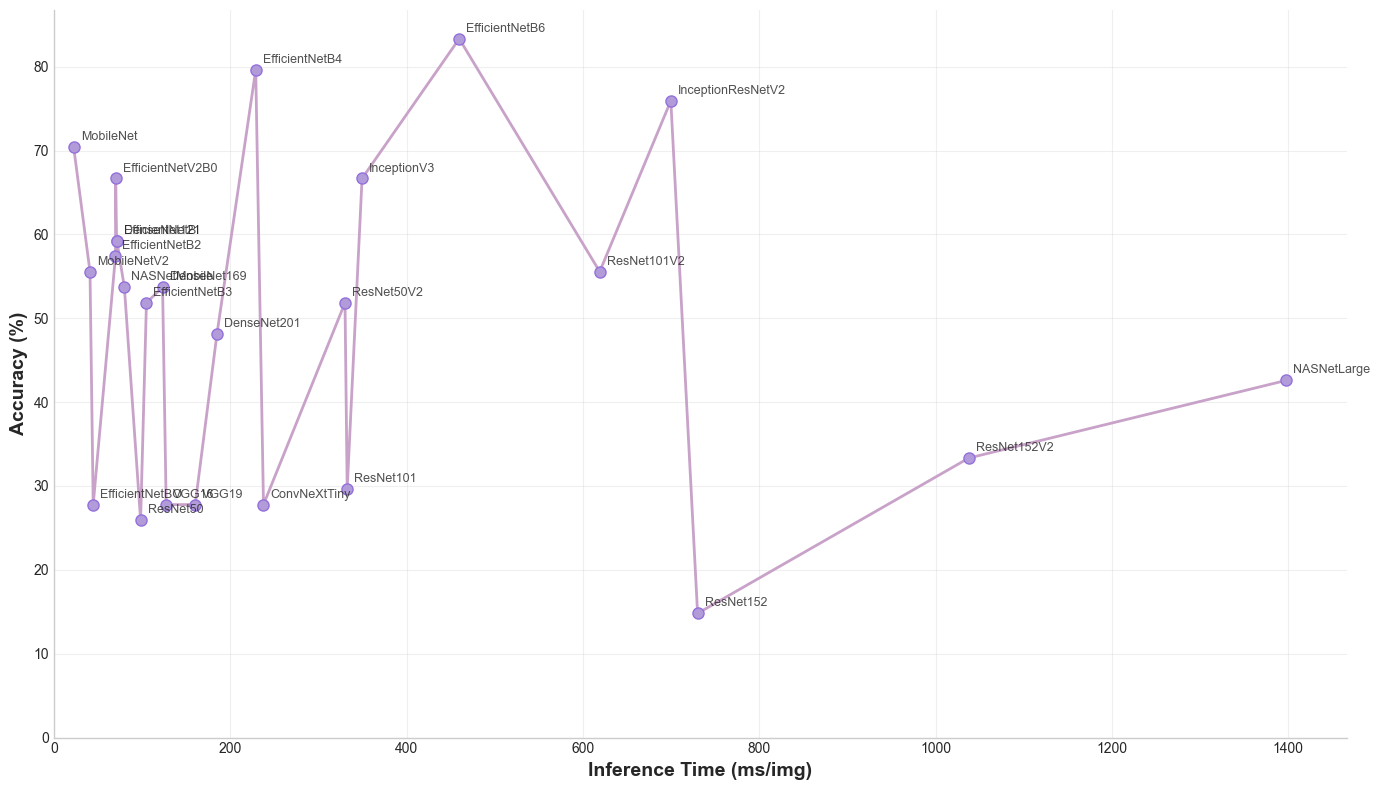

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file
df = pd.read_csv("model2.csv")

# Clean columns
df['Model'] = df['Model'].str.strip()
df['accuracy_clean'] = df['Accuracy'].astype(str).str.replace('%', '', regex=False).astype(float)
df['latency_clean'] = pd.to_numeric(df['Average inference time per image (ms)'], errors='coerce')

# Sort by latency
sorted_indices = np.argsort(df['latency_clean'])
x_sorted = df['latency_clean'].iloc[sorted_indices]
y_sorted = df['accuracy_clean'].iloc[sorted_indices]
models_sorted = df['Model'].iloc[sorted_indices]

# Plot
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(x_sorted, y_sorted, 'o-', color='#C8A2C8',
         linewidth=2, markersize=8, markerfacecolor='#B19CD9',
         markeredgecolor='#9370DB', markeredgewidth=1)

plt.xlabel('Inference Time (ms/img)', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid(True, linestyle='-', alpha=0.3)

# Label each point with model name
for i, model in enumerate(models_sorted):
    plt.annotate(model,
                 (x_sorted.iloc[i], y_sorted.iloc[i]),
                 textcoords="offset points",
                 xytext=(5,5),  # offset label a bit
                 fontsize=9,
                 alpha=0.8)

# Remove top/right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
